# IMPORTAÇÃO DE BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

# IMPORTAÇÃO DE DADOS

In [17]:
weather = pd.read_csv('https://raw.githubusercontent.com/guilourenzo/master_degree_sin5007/refs/heads/main/DATA/weatherAUS.csv').sort_values(by=['Date', 'Location'], ascending=True)
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
45587,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,Yes
45588,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,Yes
45589,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,Yes
45590,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,Yes
45591,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,No


# ENTENDIMENTO DOS DADOS

## VOLUMETRIA

In [3]:
print(f"Linhas: {weather.shape[0]:,} | Colunas: {weather.shape[1]}")

Linhas: 145,460 | Colunas: 23


## REMOÇÃO DE NULOS

In [4]:
nulos = weather.isnull().sum().reset_index().rename(columns={'index': 'Coluna', 0: 'Valores Nulos'})
nulos['Porcentagem'] = nulos['Valores Nulos'] / weather.shape[0] * 100
nulos = nulos.sort_values(by='Porcentagem', ascending=False)
print(f"Existem {nulos['Valores Nulos'].sum():,} no Dataset considerando todas as Variáveis")
nulos

Existem 343,248 no Dataset considerando todas as Variáveis


,Coluna,Valores Nulos,Porcentagem
6,Sunshine,69835,48.009762
5,Evaporation,62790,43.166506
18,Cloud3pm,59358,40.807095
17,Cloud9am,55888,38.421559
15,Pressure9am,15065,10.356799
16,Pressure3pm,15028,10.331363
9,WindDir9am,10566,7.263853
7,WindGustDir,10326,7.098859
8,WindGustSpeed,10263,7.055548
14,Humidity3pm,4507,3.098446


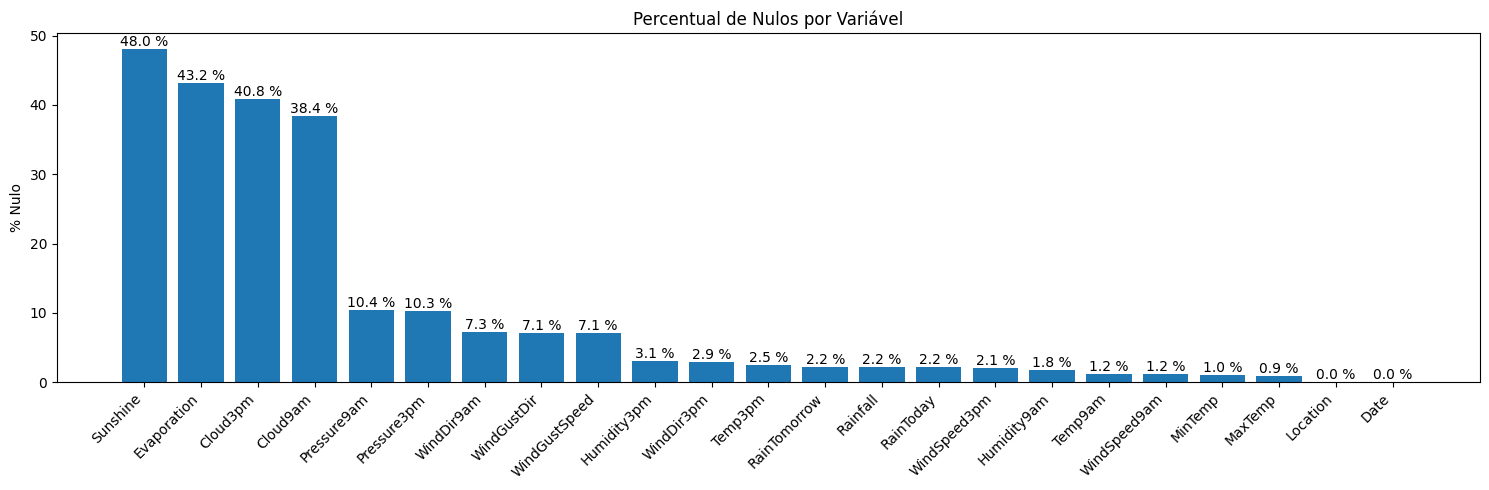

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
bar_container = ax.bar(nulos['Coluna'], nulos['Porcentagem'])
ax.set(ylabel='% Nulo', title='Percentual de Nulos por Variável')
ax.bar_label(bar_container, fmt=lambda x: f'{x * 1:.1f} %')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();

In [6]:
weather_clean = weather.dropna()
print(f"Linhas SEM NULOS: {int(weather_clean.shape[0]):,} | Colunas: {weather_clean.shape[1]}")

Linhas SEM NULOS: 56,420 | Colunas: 23


## TRANSFORMAÇÃO DAS VARIÁVEIS ALVO

In [7]:
weather.loc[:, 'Date']= pd.to_datetime(weather.Date)
weather.loc[:, 'RainToday']= weather.RainToday.map({'Yes': 1, 'No': 0})
weather.loc[:, 'RainTomorrow']= weather.RainTomorrow.map({'Yes': 1, 'No': 0})

In [8]:
weather_clean.loc[:, 'Date'] = pd.to_datetime(weather_clean.Date)
weather_clean.loc[:, 'RainToday'] = weather_clean.RainToday.map({'Yes': 1, 'No': 0})
weather_clean.loc[:, 'RainTomorrow'] = weather_clean.RainTomorrow.map({'Yes': 1, 'No': 0})

In [9]:
weather_clean.select_dtypes('number')

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
45587,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20.0,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6
45588,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17.0,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7
45589,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6.0,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2
45590,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24.0,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1
45591,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28.0,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123830,6.3,17.0,0.0,1.6,7.9,26.0,4.0,11.0,75.0,49.0,1028.6,1026.0,1.0,3.0,11.5,15.6
120637,4.9,16.8,0.0,1.6,7.9,39.0,11.0,17.0,69.0,44.0,1028.5,1026.0,1.0,3.0,12.0,16.2
33519,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8
36528,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9


## TIPOS DE DADOS

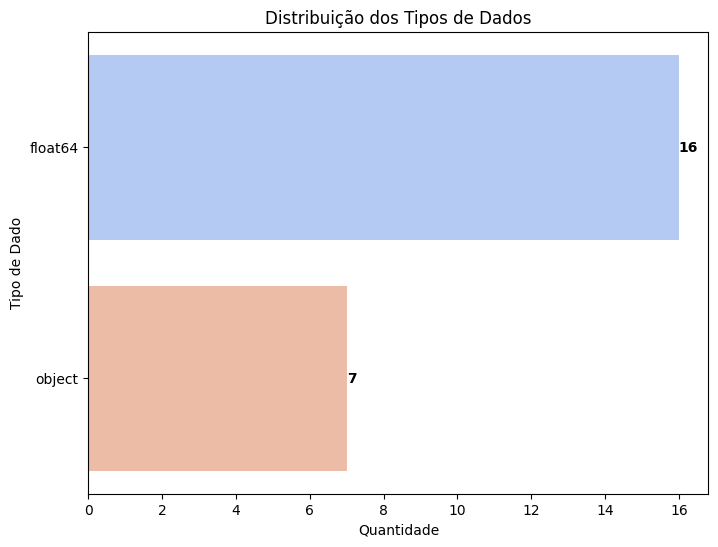

In [10]:
data_types = weather.dtypes.value_counts().reset_index()
data_types.columns = ['Data Type', 'Count']

# Visualizar a distribuição dos tipos de dados
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Count', y='Data Type', data=data_types, hue='Data Type', palette='coolwarm')
plt.title('Distribuição dos Tipos de Dados')
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Dado')

# Adicionando os valores nas barras
for index, value in enumerate(data_types['Count']):
    ax.text(value, index, f'{value}', va='center', ha='left', color='black', fontweight='bold')

plt.show();


## DISTRIBUIÇÃO DOS DADOS

In [11]:
numerical_columns = weather_clean.select_dtypes('number')

In [12]:
weather.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


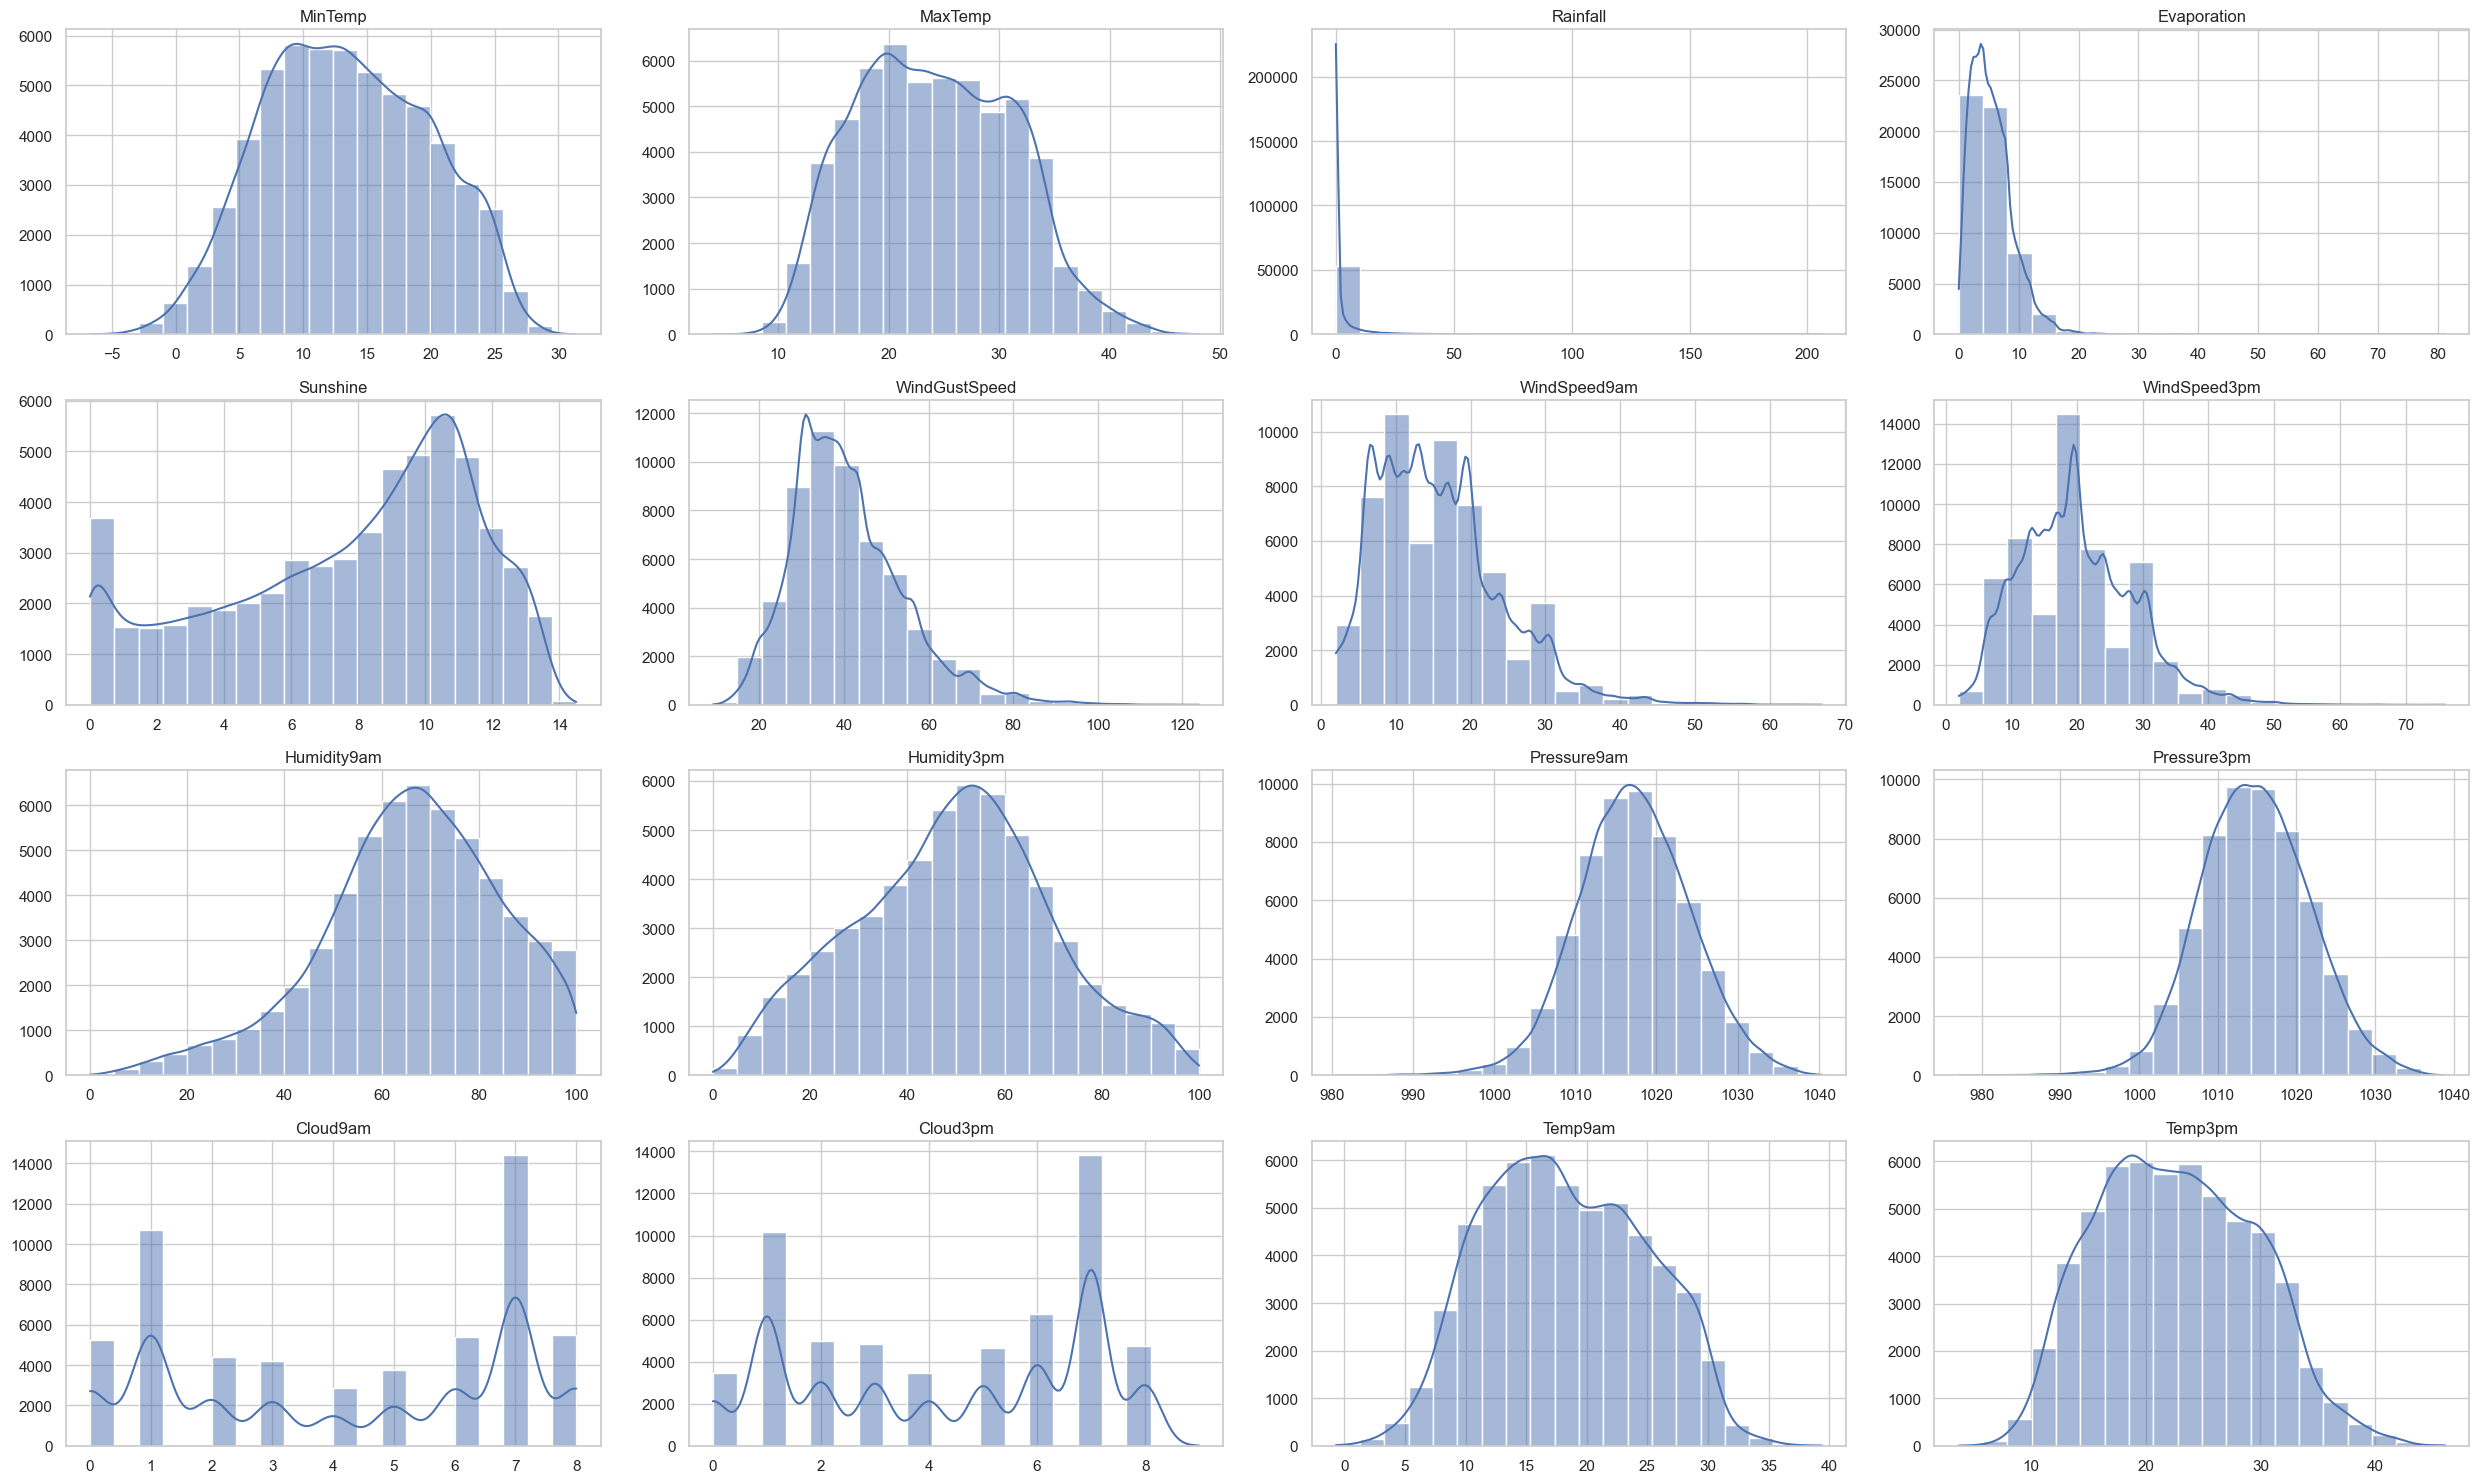

In [13]:
# Configurando o estilo do Seaborn
sns.set_theme(style="whitegrid")

# Selecionando as colunas numéricas excluindo as colunas 'Date', 'RainToday', 'RainTomorrow'
columns_to_plot = numerical_columns.columns

# Definindo o número de linhas e colunas para os subplots
n_cols = 4
n_rows = len(columns_to_plot) // n_cols + (len(columns_to_plot) % n_cols > 0)

# Criando os subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 15))
axes = axes.flatten()

# Plotando cada variável em um subplot
for i, col in enumerate(columns_to_plot):
    sns.histplot(numerical_columns[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remover os subplots vazios
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show();

RainToday - Não: 43,958 (77.91%)
RainToday - Sim: 12,462 (22.09%)
RainTomorrow - Não: 43,993 (77.97%)
RainTomorrow - Sim: 12,427 (22.03%)


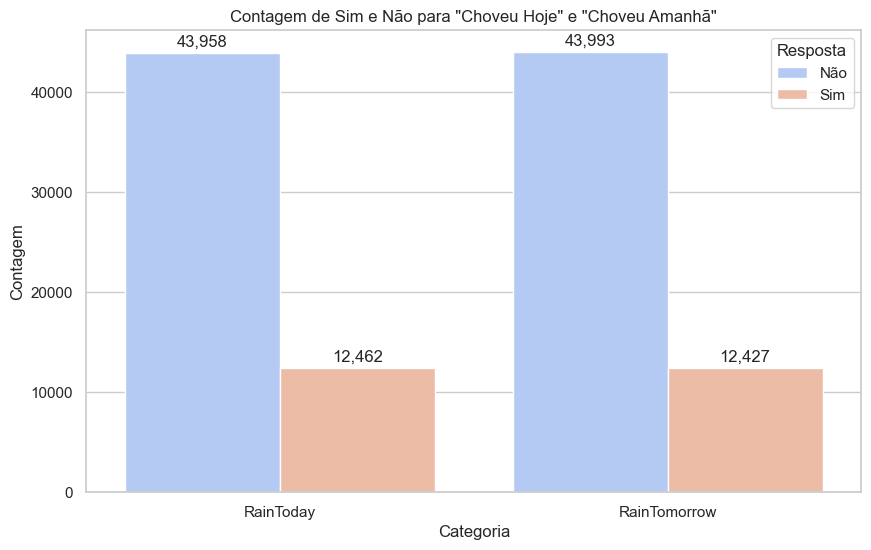

In [14]:
# Simplified version of the code

# Filter rows without missing values and replace 'Yes'/'No' with 'Sim'/'Não'
df_clean = weather_clean.dropna(subset=['RainToday', 'RainTomorrow']).replace({1: 'Sim', 0: 'Não'})

# Count and percentage for RainToday and RainTomorrow
counts = df_clean[['RainToday', 'RainTomorrow']].apply(pd.Series.value_counts)
percentages = df_clean[['RainToday', 'RainTomorrow']].apply(pd.Series.value_counts, normalize=True) * 100

# Print results
for col in ['RainToday', 'RainTomorrow']:
    for resp in ['Não', 'Sim']:
        print(f"{col} - {resp}: {counts[col][resp]:,} ({percentages[col][resp]:.2f}%)")

# Prepare DataFrame for plotting
count_df = counts.stack().reset_index()
count_df.columns = ['Resposta', 'Categoria', 'Contagem']

# Plot bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Categoria', y='Contagem', hue='Resposta', data=count_df, palette='coolwarm')

plt.ylabel('Contagem')
plt.title('Contagem de Sim e Não para "Choveu Hoje" e "Choveu Amanhã"')
plt.legend(title='Resposta')

# Add labels to bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.show()


## CORRELAÇÃO ENTRE AS VARIÁVEIS NUMÉRICAS

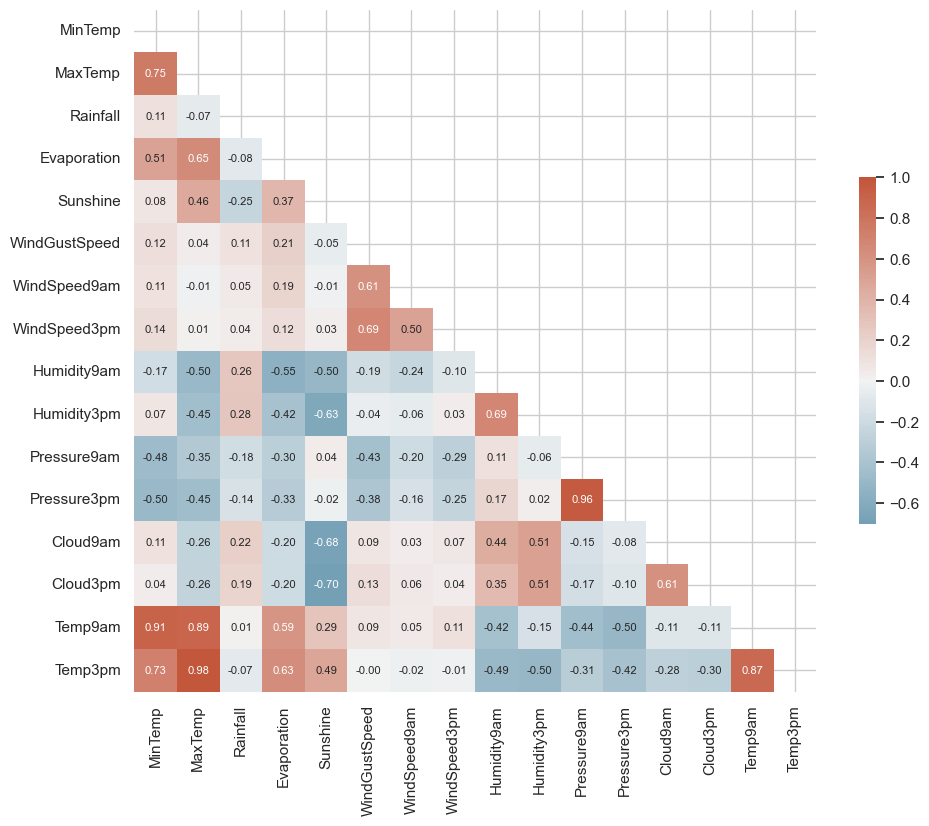

In [15]:
corr_matrix = numerical_columns.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, cbar_kws={"shrink": .5}, annot=True, fmt=".2f",
            annot_kws={"size": 8})  # Reduzindo o tamanho da fonte para 8

plt.show()

## PAIRPLOT DAS VARIÁVEIS

In [ ]:
weather_clean_pair = weather_clean[numerical_columns.columns.tolist() + ['RainTomorrow']]
weather_clean_pair.loc[:, 'RainTomorrow'] = weather_clean_pair['RainTomorrow'].astype('category')

sns.pairplot(weather_clean_pair, hue='RainTomorrow', diag_kind='kde', palette='coolwarm')
plt.show();